# TP4: Primeras nociones de estimación espectral. #


El trabajo abarca la evaluación de distintos estimadores de frecuencia y amplitud para una señal senoidal sumada a un ruido blanco gaussiano. Se estudió el efecto de la aplicación de 3 ventanas (Rectangular, Blackman-Harris y Flat Top) en el sesgo y varianza de los estimadores para valores distintas relaciones señal-ruido.


Se utilizó una señal:
$ x(n) = a1 * sen(\Omega_1 n ) + n_a (n) $

La potencia de la senoidal fue normalizada a 1 W para calibrar correctamente el SNR.

## Método: ##

Se llevaron a cabo 200 realzaciones de señales, para cada una de las cuales se tomaron 1000 muestras. Para cada una se calcularon los valores de los estimadores de $\hat{a}1^{(i)}$ y $\hat{\Omega}_1^{(i)} $. Utilizando:

$ $\hat{a}1^{(i)}$ = |X_i^w(\Omega_0)| =| \mathcal{F}{ x(n) w_i(n) }|$

$ \hat{\Omega}_1^{(i)} = \arg\max_{\Omega}{|X_i^w(\Omega)|} $

Es decir que el estimador de amplitud  $\hat{a}1^{(i)}$  se obtiene como el valor absoluto de la transformada del producto de la función x(n) y la ventada elegida. 
En cuanto al estimador de frecuencia $ \hat{\Omega}_1^{(i)} $, se obtiene como el argumento máximo del valor absoluto de la transformada de la señal. Es decir, el valor de entrada para el cuál la salida alcanza un máximo.
Para ello, se implementó el siguiente código:

### Resultados para SNR = 10 ###

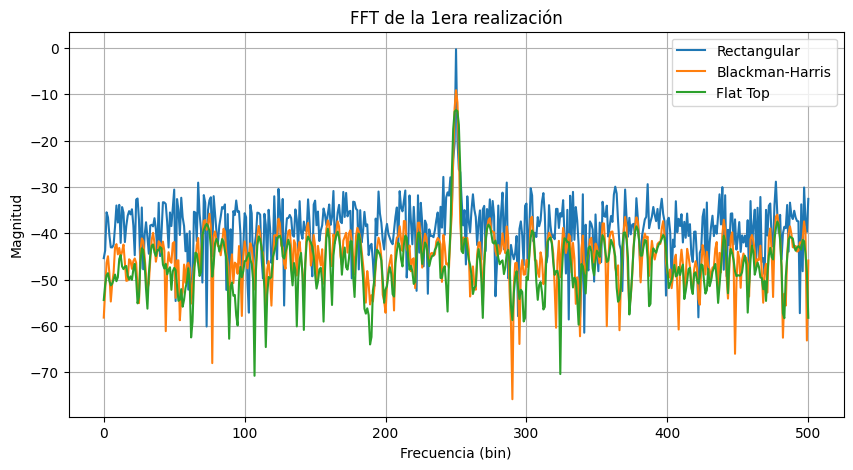

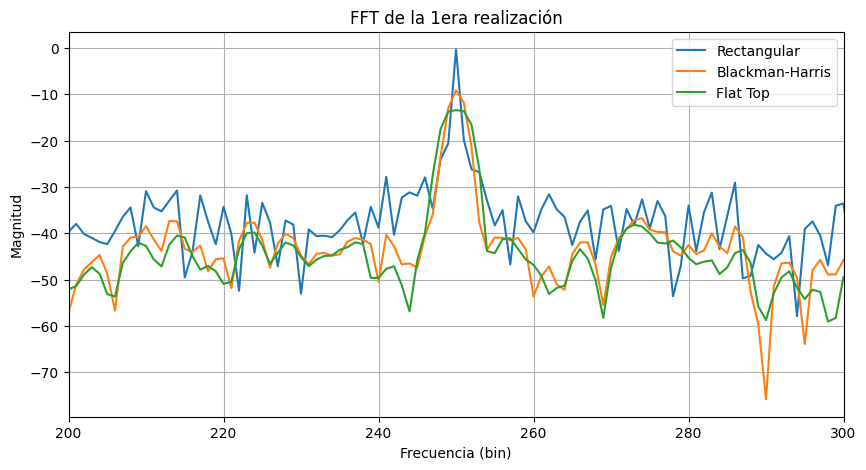

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

#%% Función para generar la señal seno
def seno(N, R, SNR):
    
    N=1000
    fs=1000
    df= fs/N
    w0 = fs/4
    a1=np.sqrt(2)
    R=200
    

    t = np.arange(0,1,1/N).reshape(N, 1)
    tt=np.tile(t, (1,R))#repite tt 200 veces en el eje de las columnas


    fr = np.random.uniform(-1/2, 1/2, size=(1, R))
    w1 = w0 + fr * df

    S = a1*np.sin(2*np.pi*w1*tt) #1000 * 200
    
    potseñal = np.mean(S**2)
    potruido = potseñal / (10**(SNR/10))
    

    ruido=np.random.normal(0, np.sqrt(potruido), size=S.shape)
    
    Xr = S + ruido #genera 200 señales con ruido
    
    return Xr, w1

#%%señales
Xr, w1 = seno(N=1000, R=200, SNR=10)
fs = 1000
N=1000
df=fs/N
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2 #hasta nyquist, por la simetría de la fft, lo demás es redundante.
w0 = fs/4
a1= np.sqrt(2)

Xr_fft = np.fft.fft(Xr, axis=0)
MAG_Xr_fft = 1/N * np.abs(Xr_fft)

#%% VENTANAS
ventana2=sig.windows.blackmanharris(N).reshape(N,1)
senal_BH = Xr * ventana2 #1000X200

senal_BH_fft= np.fft.fft(senal_BH,axis=0)
MAGsenal_BH_fft = 1/N * np.abs(senal_BH_fft) 

ventana=sig.windows.flattop(N).reshape(N,1)
senal_FT = Xr * ventana #1000X200

senal_FT_fft= np.fft.fft(senal_FT,axis=0)
MAGsenal_FT_fft = 1/N * np.abs(senal_FT_fft) 

plt.figure(figsize=(10, 5))  # Ajustar tamaño del gráfic
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAG_Xr_fft[bfrec, 0])**2), label="Rectangular")
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAGsenal_BH_fft[bfrec, 0])**2), label="Blackman-Harris")
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAGsenal_FT_fft[bfrec, 0])**2), label="Flat Top")
plt.title("FFT de la 1era realización")
plt.xlabel("Frecuencia (bin)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))  # Ajustar tamaño del gráfic
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAG_Xr_fft[bfrec, 0])**2), label="Rectangular")
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAGsenal_BH_fft[bfrec, 0])**2), label="Blackman-Harris")
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAGsenal_FT_fft[bfrec, 0])**2), label="Flat Top")
plt.xlim(200, 300)
plt.title("FFT de la 1era realización")
plt.xlabel("Frecuencia (bin)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()
plt.show()



Se observa el efecto del ventaneo de la señal contaminada con las tres ventanas utilizadas: Blackman Harris, Rectangular y Flattop. Observamos que la ventana rectangular produce un pico angosto con lóbulos laterales elevados, por otro lado, la Blackman-Harris logra una atenuación de las lóbulos laterales, pero produce un ensanchamiento del lóbulo principal, lo que reduce la resolución en frecuencia. Por último, la Flat toptinee un pico aún más ancho y lóbulos laterales muy atenuados. 
Observacion: A medida que el lóbulo principal es más ancho, el piso de ruido disminuye. Esto se atribuye a que se da una significativa atenuación de los lóbulos laterales, lo que reduce el desparramo espectral.

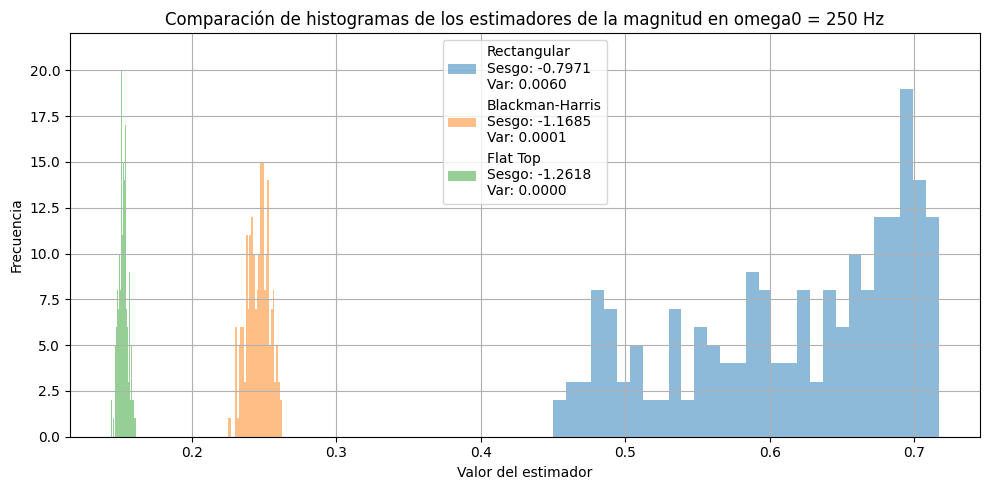

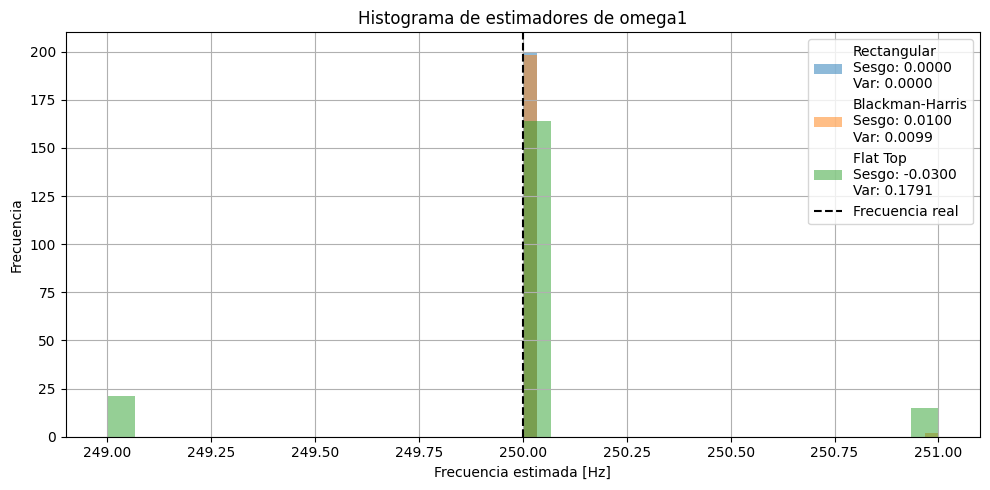

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

#%% Función para generar la señal seno
def seno(N, R, SNR):
    
    N=1000
    fs=1000
    df= fs/N
    w0 = fs/4
    a1=np.sqrt(2)
    R=200

    t = np.arange(0,1,1/N).reshape(N, 1)
    tt=np.tile(t, (1,R))#repite tt 200 veces en el eje de las columnas


    fr = np.random.uniform(-1/2, 1/2, size=(1, R))
    w1 = w0 + fr * df

    S = a1*np.sin(2*np.pi*w1*tt) #1000 * 200
    
    potseñal = np.mean(S**2)
    potruido = potseñal / (10**(SNR/10))
    
    ruido=np.random.normal(0, np.sqrt(potruido), size=S.shape)
    
    Xr = S + ruido #genera 200 señales con ruido
    
    return Xr, w1

#%%señales
Xr, w1 = seno(N=1000, R=200, SNR=10)
fs = 1000
N=1000
df=fs/N
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2 #hasta nyquist, por la simetría de la fft, lo demás es redundante.
w0 = fs/4
a1= np.sqrt(2)

Xr_fft = np.fft.fft(Xr, axis=0)
MAG_Xr_fft = 1/N * np.abs(Xr_fft)

    
#%% VENTANAS


ventana2=sig.windows.blackmanharris(N).reshape(N,1)
senal_BH = Xr * ventana2 #1000X200

senal_BH_fft= np.fft.fft(senal_BH,axis=0)
MAGsenal_BH_fft = 1/N * np.abs(senal_BH_fft) 

ventana=sig.windows.flattop(N).reshape(N,1)
senal_FT = Xr * ventana #1000X200

senal_FT_fft= np.fft.fft(senal_FT,axis=0)
MAGsenal_FT_fft = 1/N * np.abs(senal_FT_fft) 

#############
# Histograma
#############

aest_BH =  MAGsenal_BH_fft[round(w0)]
aest_FT = MAGsenal_FT_fft[round(w0)]
aest_rect = MAG_Xr_fft[round(w0)]
#%% Calculo de sesgo

sesgo_BH = np.mean(aest_BH)- a1
sesgo_FT = np.mean(aest_FT)- a1
sesgo_RECT = np.mean(aest_rect)-a1

var_BH = np.var(aest_BH)
var_FT =np.var(aest_FT)
var_RECT = np.var(aest_rect)

plt.figure(figsize=(10,5))
bins = 30
plt.hist(aest_rect, bins=bins, alpha=0.5, label=f"Rectangular\nSesgo: {sesgo_RECT:.4f}\nVar: {var_RECT:.4f}")
plt.hist(aest_BH, bins=bins, alpha=0.5, label=f"Blackman-Harris\nSesgo: {sesgo_BH:.4f}\nVar: {var_BH:.4f}")
plt.hist(aest_FT, bins=bins, alpha=0.5, label=f"Flat Top\nSesgo: {sesgo_FT:.4f}\nVar: {var_FT:.4f}")

plt.xlabel("Valor del estimador")
plt.ylabel("Frecuencia")
plt.title("Comparación de histogramas de los estimadores de la magnitud en omega0 = 250 Hz")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#%% Estimador de frecuencia

# ARGMAX= punto de entrada donde se maximiza la salida
# el estimador omegahat de omega1 es la entrada donde Xw alcanza un max
R=200
fs = 1000
N=1000
df=fs/N

kmax_BH = np.argmax(MAGsenal_BH_fft)
kmax_FT = np.argmax(MAGsenal_FT_fft)
kmax_RECT = np.argmax(MAG_Xr_fft)

omega1est_BH = np.zeros(R)
omega1est_FT = np.zeros(R)
omega1est_RECT = np.zeros(R) #3 vectores de 200 elementos inicializados en 0

for i in range(R):
    kmax_BH = np.argmax(MAGsenal_BH_fft[:N//2, i])  # hasta Nyquist
    kmax_FT = np.argmax(MAGsenal_FT_fft[:N//2, i])
    kmax_RECT = np.argmax(MAG_Xr_fft[:N//2, i])

    omega1est_BH[i] = kmax_BH * df
    omega1est_FT[i] = kmax_FT * df
    omega1est_RECT[i] = kmax_RECT * df

sesgo_w_BH = np.mean(omega1est_BH) - w0
sesgo_w_FT = np.mean(omega1est_FT) - w0
sesgo_w_RECT = np.mean(omega1est_RECT) - w0

var_w_BH = np.var(omega1est_BH)
var_w_FT = np.var(omega1est_FT)
var_w_RECT = np.var(omega1est_RECT)

    
plt.figure(figsize=(10, 5))
plt.hist(omega1est_RECT, bins=30, alpha=0.5, label=f'Rectangular\nSesgo: {sesgo_w_RECT:.4f}\nVar: {var_w_RECT:.4f}')
plt.hist(omega1est_BH, bins=30, alpha=0.5, label=f'Blackman-Harris\nSesgo: {sesgo_w_BH:.4f}\nVar: {var_w_BH:.4f}')
plt.hist(omega1est_FT, bins=30, alpha=0.5, label=f'Flat Top\nSesgo: {sesgo_w_FT:.4f}\nVar: {var_w_FT:.4f}')
plt.axvline(w0, color='k', linestyle='--', label='Frecuencia real')
plt.xlabel('Frecuencia estimada [Hz]')
plt.ylabel('Frecuencia')
plt.title('Histograma de estimadores de omega1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




En la primer figura se obsreva la distribuciñon de los estimadores de amplitud $\hat{a}1^{(i)}$ de la senoidal de frecuencia $\omega_0 = 250 Hz$ para las tres ventanas de interés. En la leyenda se observan elsesgo (diferencia entre el valor medio estimado y el real ($a_1 = \sqrt{2}$) y la varianza. Para la ventana rectangular, se observó una varianza relativamente alta y un sesgo menor al del resto de las ventanas, esto sugiere que la estimaciñon es poco precisa pero relativamente exacta. En cuanto a la Bñackman-Harris, su sesgo es aún mayor pero con una varianza significativamente menor, lo que sugiere que, en comparación a la rectangular, esta ventana produce una estimación más preciso y menos exacta. Por último, la Flat Top tiene el mayor sesgo, es la que más subestima la amplitud, sin embargo, su varianza es la menor de las 3, por lo tanto, de las tres ventanas, la última es la de mayor precisión y menor exactitud.  
El uso de ventanas actúa como un filto, ya que multiplica la señal en dominio temporal, resultando en una convoluciñon en el dominio de frecuencia, La forma de cada ventana incide directamente en el comportamiento como estimador de magnitud y frecuencia. La ventana rectangular se transforma como una sinc, que se caracteriza por su pico angosto y lóbulos laterales altos. Esto resulta en mucho desparramo espectral cuando la frecuencia no cae exactamente en un bin, resultando en una alta varaianza. En cuanto a la Blackman-Harris, su lóbulo principal es más anchos, con lóbulos laterales muy atenuados, resultando en menos desparramo y, por lo tanto, menos varianza. No obstante, el ensanchamiento del lóbulo principal reduce la altura del máximo, lo cual produce un sesgo negativo. Por último, la ventana Flat top posee el lóbulo principal más ancho, con lóbulos laterales extremadamente atenuados, esto produce una precisión extremadamente alta (baja varianza) pero estimaciones muy sesgadas por debajo del valor real debido a la redistribución de la energñia en el lóbulo principal.
La segunda figura muestra la distribución de los estimadores de frecuencia de la senoidal. En este caso, se observar que la ventana rectangular parece ser la máz exacta y precisa de las tres, pues posee un menor sesgo y varianza, esto se debe  que posee un lóbulo principal muy angoso, lo cual permite una resolución en frecuencia muy buena. En cuanto a la BlackmanhHarris, su varianza y sesgo fueron ligeramente mayores, esto se debe a que su lóbulo principal es más ancho, esto sugiere que si bien se desempeña peor para señales con una frecuencia bien aislada (como este caso) pero que podría ser de mayor utilidad en casos donde hay señales cercanas en frecuencia. Por último, la Flat top fue la menos exacta y precisa de las tres, lo cual se debe a que posee el lóbulo princial mas ancho que si bien es útil para medir amplitudes con precisión,resulta mala para estimar frecuencias.


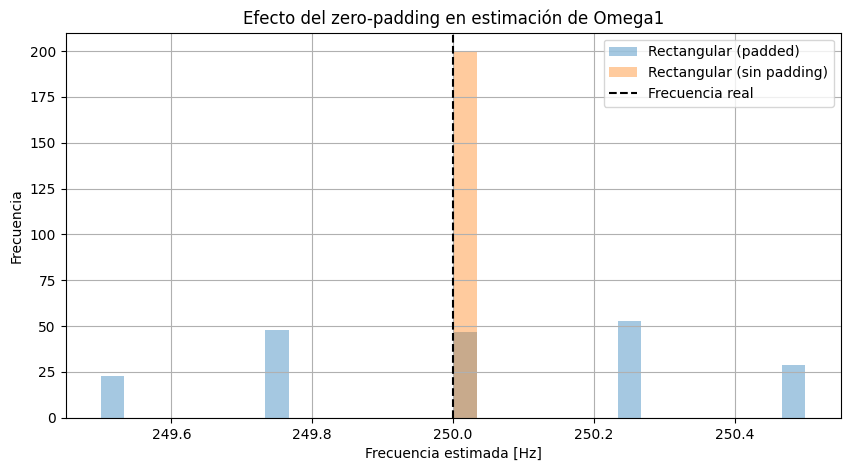

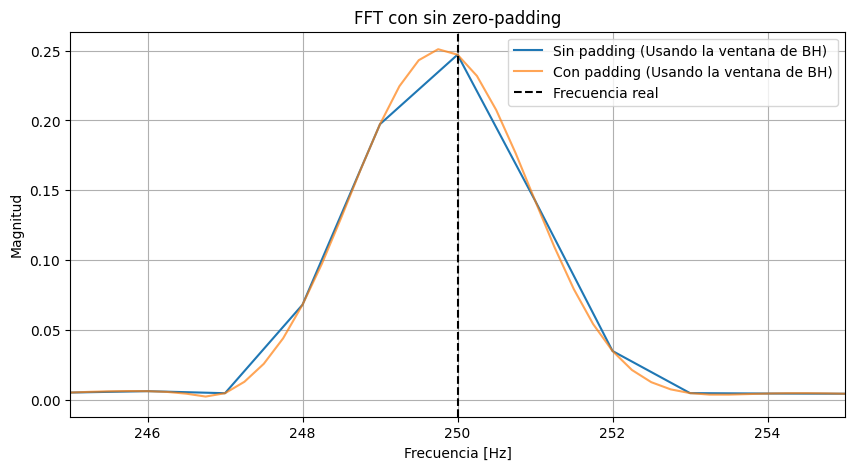

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

#%% Función para generar la señal seno
def seno(N, R, SNR):
    
    N=1000
    fs=1000
    df= fs/N
    w0 = fs/4
    a1=np.sqrt(2)
    R=200

    t = np.arange(0,1,1/N).reshape(N, 1)
    tt=np.tile(t, (1,R))#repite tt 200 veces en el eje de las columnas


    fr = np.random.uniform(-1/2, 1/2, size=(1, R))
    w1 = w0 + fr * df

    S = a1*np.sin(2*np.pi*w1*tt) #1000 * 200
    
    potseñal = np.mean(S**2)
    potruido = potseñal / (10**(SNR/10))
    
    ruido=np.random.normal(0, np.sqrt(potruido), size=S.shape)
    
    Xr = S + ruido #genera 200 señales con ruido
    
    return Xr, w1

#%%señales
Xr, w1 = seno(N=1000, R=200, SNR=10)
fs = 1000
N=1000
df=fs/N
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2 #hasta nyquist, por la simetría de la fft, lo demás es redundante.
w0 = fs/4
a1= np.sqrt(2)

Xr_fft = np.fft.fft(Xr, axis=0)
MAG_Xr_fft = 1/N * np.abs(Xr_fft)

    
#%% VENTANAS


ventana2=sig.windows.blackmanharris(N).reshape(N,1)
senal_BH = Xr * ventana2 #1000X200

senal_BH_fft= np.fft.fft(senal_BH,axis=0)
MAGsenal_BH_fft = 1/N * np.abs(senal_BH_fft) 

ventana=sig.windows.flattop(N).reshape(N,1)
senal_FT = Xr * ventana #1000X200

senal_FT_fft= np.fft.fft(senal_FT,axis=0)
MAGsenal_FT_fft = 1/N * np.abs(senal_FT_fft) 
#%% ZERO padding
fs=1000
Npad = 4000
R = 200
senal_BH_pad = np.zeros((Npad, R))
senal_FT_pad = np.zeros((Npad, R))
Xrpad = np.zeros((Npad, R))

senal_BH_pad[:N, :] = senal_BH #copio la senal original en las primeras N filas e todas las columnas
senal_FT_pad[:N, :] = senal_FT
Xrpad[:N, :] = Xr

BH_fft_pad = np.fft.fft(senal_BH_pad, axis=0)
FT_fft_pad = np.fft.fft(senal_FT_pad, axis=0)
RECT_fft_pad = np.fft.fft(Xrpad, axis=0)

MAG_BH_pad = 1/N * np.abs(BH_fft_pad)
MAG_FT_pad = 1/N * np.abs(FT_fft_pad)
MAG_RECT_pad = 1/N * np.abs(RECT_fft_pad)

dfpad = fs / Npad
ffpad = np.linspace(0, fs - dfpad, Npad)

omega1est_BH_pad = np.zeros(R)
omega1est_FT_pad = np.zeros(R)
omega1est_RECT_pad = np.zeros(R)

for i in range(R):
    kmax_BH_pad = np.argmax(MAG_BH_pad[:Npad//2, i])
    kmax_FT_pad = np.argmax(MAG_FT_pad[:Npad//2, i])
    kmax_RECT_pad = np.argmax(MAG_RECT_pad[:Npad//2, i])

    omega1est_BH_pad[i] = kmax_BH_pad * dfpad
    omega1est_FT_pad[i] = kmax_FT_pad * dfpad
    omega1est_RECT_pad[i] = kmax_RECT_pad * dfpad

plt.figure(figsize=(10, 5))
plt.hist(omega1est_RECT_pad, bins=30, alpha=0.4, label='Rectangular (padded)')
plt.hist(omega1est_RECT, bins=30, alpha=0.4, label='Rectangular (sin padding)')
plt.axvline(w0, color='k', linestyle='--', label='Frecuencia real')
plt.xlabel('Frecuencia estimada [Hz]')
plt.ylabel('Frecuencia')
plt.title('Efecto del zero-padding en estimación de Omega1')
plt.legend()
plt.grid()
plt.show()

ffpad = np.linspace(0, fs - dfpad, Npad)
plt.figure(figsize=(10,5))
plt.plot(ff, MAGsenal_BH_fft[:, i], label="Sin padding (Usando la ventana de BH)")
plt.plot(ffpad, MAG_BH_pad[:, i], label="Con padding (Usando la ventana de BH)", alpha=0.7)

plt.axvline(w0, color='k', linestyle='--', label='Frecuencia real')

plt.xlim(245, 255)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("FFT con sin zero-padding")
plt.grid()
plt.legend()
plt.show()

#%% ZERO padding (Se agregó un gráfico comparativo entre la fft con y sin padding para ver como cambia el pico alrededor de 250 Hz)

Se observa el efecto del Zero-Padding sobre la estimación de la frecuencia usando la ventana rectangular. En el eje de frecuencia estimada, se ven los valores en los cuales el estimador detectó un máximo de la FFT. Los resultados sin padding reflejan una única estimación de frecuencia por bin, por este motivo, se observa una única barra en 250 Hz. Si bien esto podría prestar a la confusión, (concluir que la estimación con padding es peor), no es exactamente eso lo que sucede. Al aplicar ZP con Npad=4000, dfpad resulta 1000/4000 = 0,25 Hz. Para este caso, los máxmimos no caen todos en 250 Hz, sino en los distintos múltiplos de fs,(249.5, 249.75, 250.25, 250.5), esto implica que el padding permite ver detalles más finos en la fecuencia, gracias al aumento de los bins y a resolución espectral más fina. 
Para interpretar el efecto del zero padding en el espectro, se graficon las FFT de la señal senoidal inicial ventaneada con la misma ventana (BH) en único gráfico. la figura evidencia como el zero padding no produce cambios en la forma del espectro, sino que produce una curva más suave, resultante de la interpolación de más bins. Se ve en forma clara la mejora en la resolución. Para este caso, donde dfpad es 4 veces más chico, la resolción de la FFT con padding es 4 veces mejor. (vemos 4 puntos vs 1)

### Resultados para SNR = 3 ###

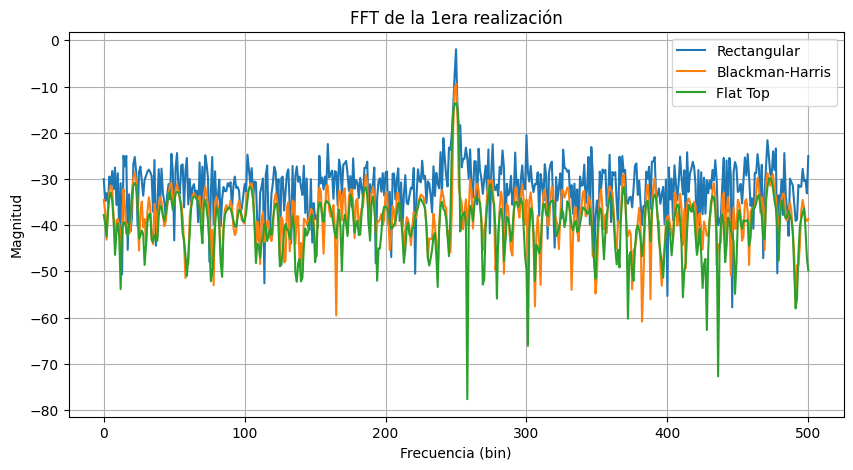

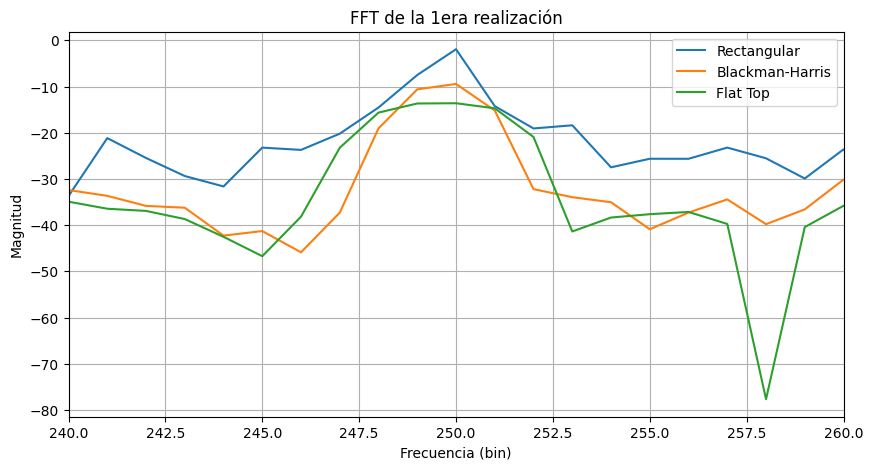

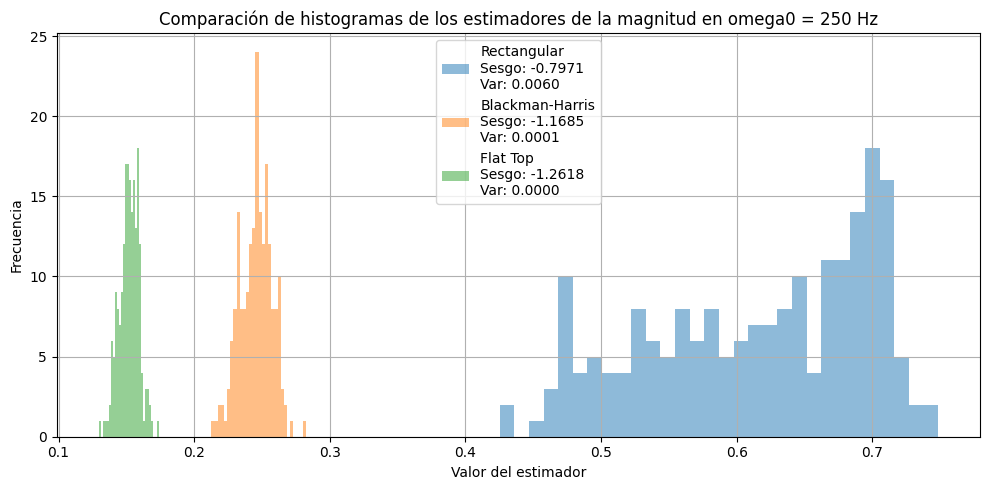

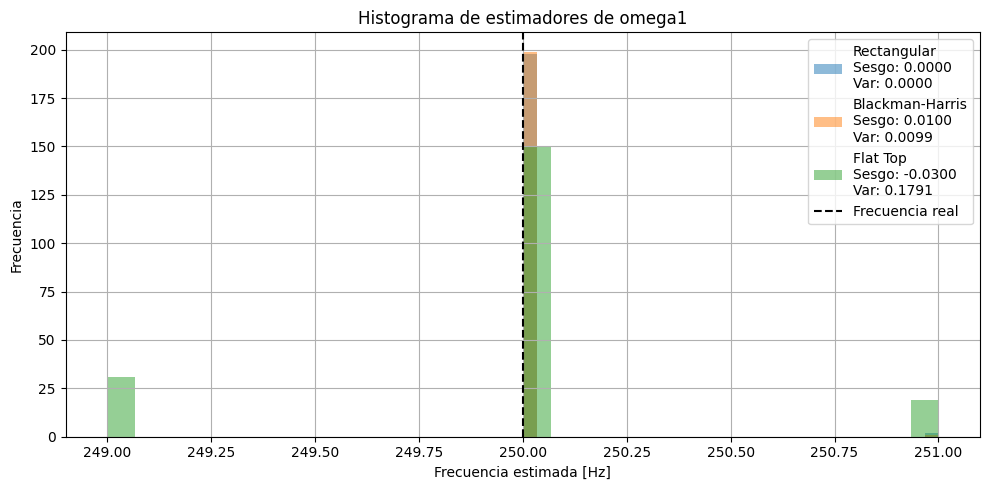

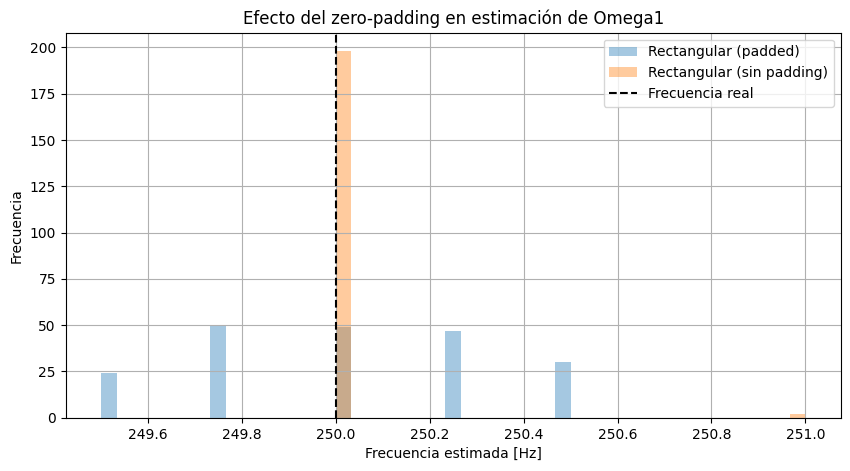

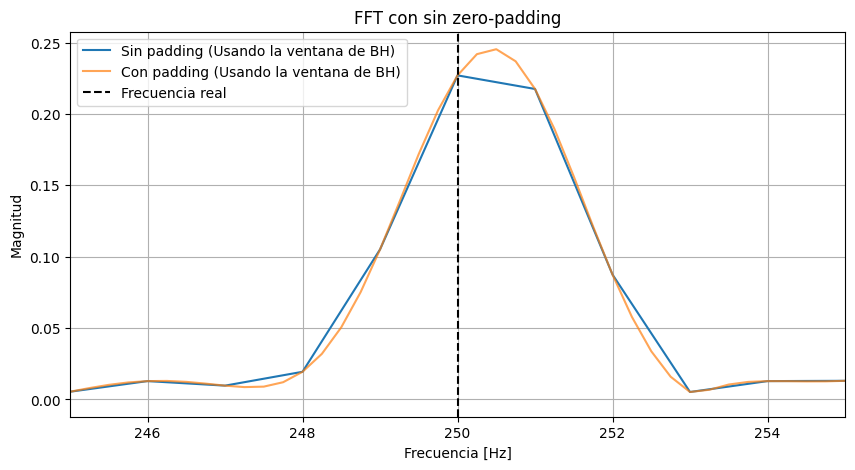

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

#%% Función para generar la señal seno
def seno(N, R, SNR):
    
    N=1000
    fs=1000
    df= fs/N
    w0 = fs/4
    a1=np.sqrt(2)
    R=200
    

    t = np.arange(0,1,1/N).reshape(N, 1)
    tt=np.tile(t, (1,R))#repite tt 200 veces en el eje de las columnas


    fr = np.random.uniform(-1/2, 1/2, size=(1, R))
    w1 = w0 + fr * df

    S = a1*np.sin(2*np.pi*w1*tt) #1000 * 200
    
    potseñal = np.mean(S**2)
    potruido = potseñal / (10**(SNR/10))
    

    ruido=np.random.normal(0, np.sqrt(potruido), size=S.shape)
    
    Xr = S + ruido #genera 200 señales con ruido
    
    return Xr, w1

#%%señales
Xr, w1 = seno(N=1000, R=200, SNR=3)
fs = 1000
N=1000
df=fs/N
ff = np.linspace(0, (N-1)*df, N)
bfrec = ff <= fs/2 #hasta nyquist, por la simetría de la fft, lo demás es redundante.
w0 = fs/4
a1= np.sqrt(2)

Xr_fft = np.fft.fft(Xr, axis=0)
MAG_Xr_fft = 1/N * np.abs(Xr_fft)

#%% VENTANAS
ventana2=sig.windows.blackmanharris(N).reshape(N,1)
senal_BH = Xr * ventana2 #1000X200

senal_BH_fft= np.fft.fft(senal_BH,axis=0)
MAGsenal_BH_fft = 1/N * np.abs(senal_BH_fft) 

ventana=sig.windows.flattop(N).reshape(N,1)
senal_FT = Xr * ventana #1000X200

senal_FT_fft= np.fft.fft(senal_FT,axis=0)
MAGsenal_FT_fft = 1/N * np.abs(senal_FT_fft) 

plt.figure(figsize=(10, 5))  # Ajustar tamaño del gráfic
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAG_Xr_fft[bfrec, 0])**2), label="Rectangular")
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAGsenal_BH_fft[bfrec, 0])**2), label="Blackman-Harris")
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAGsenal_FT_fft[bfrec, 0])**2), label="Flat Top")
plt.title("FFT de la 1era realización")
plt.xlabel("Frecuencia (bin)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))  # Ajustar tamaño del gráfic
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAG_Xr_fft[bfrec, 0])**2), label="Rectangular")
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAGsenal_BH_fft[bfrec, 0])**2), label="Blackman-Harris")
plt.plot(ff[bfrec], 10 * np.log10(2 * (MAGsenal_FT_fft[bfrec, 0])**2), label="Flat Top")
plt.xlim(240, 260)
plt.title("FFT de la 1era realización")
plt.xlabel("Frecuencia (bin)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.legend()
plt.show()

#############
# Histograma
#############

aest_BH =  MAGsenal_BH_fft[round(w0)]
aest_FT = MAGsenal_FT_fft[round(w0)]
aest_rect = MAG_Xr_fft[round(w0)]

plt.figure(figsize=(10,5))
bins = 30
plt.hist(aest_rect, bins=bins, alpha=0.5, label=f"Rectangular\nSesgo: {sesgo_RECT:.4f}\nVar: {var_RECT:.4f}")
plt.hist(aest_BH, bins=bins, alpha=0.5, label=f"Blackman-Harris\nSesgo: {sesgo_BH:.4f}\nVar: {var_BH:.4f}")
plt.hist(aest_FT, bins=bins, alpha=0.5, label=f"Flat Top\nSesgo: {sesgo_FT:.4f}\nVar: {var_FT:.4f}")

plt.xlabel("Valor del estimador")
plt.ylabel("Frecuencia")
plt.title("Comparación de histogramas de los estimadores de la magnitud en omega0 = 250 Hz")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#%% Calculo de sesgo

sesgo_BH = np.mean(aest_BH)- a1
sesgo_FT = np.mean(aest_FT)- a1
sesgo_RECT = np.mean(aest_rect)-a1

var_BH = np.var(aest_BH)
var_FT =np.var(aest_FT)
var_RECT = np.var(aest_rect)

#%% Estimador de frecuencia

# ARGMAX= punto de entrada donde se maximiza la salida
# el estimador omegahat de omega1 es la entrada donde Xw alcanza un max
R=200
fs = 1000
N=1000
df=fs/N

kmax_BH = np.argmax(MAGsenal_BH_fft)
kmax_FT = np.argmax(MAGsenal_FT_fft)
kmax_RECT = np.argmax(MAG_Xr_fft)

omega1est_BH = np.zeros(R)
omega1est_FT = np.zeros(R)
omega1est_RECT = np.zeros(R) #3 vectores de 200 elementos inicializados en 0

for i in range(R):
    kmax_BH = np.argmax(MAGsenal_BH_fft[:N//2, i])  # hasta Nyquist
    kmax_FT = np.argmax(MAGsenal_FT_fft[:N//2, i])
    kmax_RECT = np.argmax(MAG_Xr_fft[:N//2, i])

    omega1est_BH[i] = kmax_BH * df
    omega1est_FT[i] = kmax_FT * df
    omega1est_RECT[i] = kmax_RECT * df
    
plt.figure(figsize=(10, 5))
plt.hist(omega1est_RECT, bins=30, alpha=0.5, label=f'Rectangular\nSesgo: {sesgo_w_RECT:.4f}\nVar: {var_w_RECT:.4f}')
plt.hist(omega1est_BH, bins=30, alpha=0.5, label=f'Blackman-Harris\nSesgo: {sesgo_w_BH:.4f}\nVar: {var_w_BH:.4f}')
plt.hist(omega1est_FT, bins=30, alpha=0.5, label=f'Flat Top\nSesgo: {sesgo_w_FT:.4f}\nVar: {var_w_FT:.4f}')
plt.axvline(w0, color='k', linestyle='--', label='Frecuencia real')
plt.xlabel('Frecuencia estimada [Hz]')
plt.ylabel('Frecuencia')
plt.title('Histograma de estimadores de omega1')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

sesgo_w_BH = np.mean(omega1est_BH) - w0
sesgo_w_FT = np.mean(omega1est_FT) - w0
sesgo_w_RECT = np.mean(omega1est_RECT) - w0

var_w_BH = np.var(omega1est_BH)
var_w_FT = np.var(omega1est_FT)
var_w_RECT = np.var(omega1est_RECT)
#%% ZERO padding
fs=1000
Npad = 4000
R = 200
senal_BH_pad = np.zeros((Npad, R))
senal_FT_pad = np.zeros((Npad, R))
Xrpad = np.zeros((Npad, R))

senal_BH_pad[:N, :] = senal_BH #copio la senal original en las primeras N filas e todas las columnas
senal_FT_pad[:N, :] = senal_FT
Xrpad[:N, :] = Xr

BH_fft_pad = np.fft.fft(senal_BH_pad, axis=0)
FT_fft_pad = np.fft.fft(senal_FT_pad, axis=0)
RECT_fft_pad = np.fft.fft(Xrpad, axis=0)

MAG_BH_pad = 1/N * np.abs(BH_fft_pad)
MAG_FT_pad = 1/N * np.abs(FT_fft_pad)
MAG_RECT_pad = 1/N * np.abs(RECT_fft_pad)

dfpad = fs / Npad
ffpad = np.linspace(0, fs - dfpad, Npad)

omega1est_BH_pad = np.zeros(R)
omega1est_FT_pad = np.zeros(R)
omega1est_RECT_pad = np.zeros(R)

for i in range(R):
    kmax_BH_pad = np.argmax(MAG_BH_pad[:Npad//2, i])
    kmax_FT_pad = np.argmax(MAG_FT_pad[:Npad//2, i])
    kmax_RECT_pad = np.argmax(MAG_RECT_pad[:Npad//2, i])

    omega1est_BH_pad[i] = kmax_BH_pad * dfpad
    omega1est_FT_pad[i] = kmax_FT_pad * dfpad
    omega1est_RECT_pad[i] = kmax_RECT_pad * dfpad

plt.figure(figsize=(10, 5))
plt.hist(omega1est_RECT_pad, bins=30, alpha=0.4, label='Rectangular (padded)')
plt.hist(omega1est_RECT, bins=30, alpha=0.4, label='Rectangular (sin padding)')
plt.axvline(w0, color='k', linestyle='--', label='Frecuencia real')
plt.xlabel('Frecuencia estimada [Hz]')
plt.ylabel('Frecuencia')
plt.title('Efecto del zero-padding en estimación de Omega1')
plt.legend()
plt.grid()
plt.show()

ffpad = np.linspace(0, fs - dfpad, Npad)
plt.figure(figsize=(10,5))
plt.plot(ff, MAGsenal_BH_fft[:, i], label="Sin padding (Usando la ventana de BH)")
plt.plot(ffpad, MAG_BH_pad[:, i], label="Con padding (Usando la ventana de BH)", alpha=0.7)

plt.axvline(w0, color='k', linestyle='--', label='Frecuencia real')

plt.xlim(245, 255)
plt.xlabel("Frecuencia [Hz]")
plt.ylabel("Magnitud")
plt.title("FFT con sin zero-padding")
plt.grid()
plt.legend()
plt.show()

#%% ZERO padding (Se agregó un gráfico comparativo entre la fft con y sin padding para ver como cambia el pico alrededor de 250 Hz)


## Cuadro comparativo de resultados de estimadores para SNR = 10 y 3 dB ##

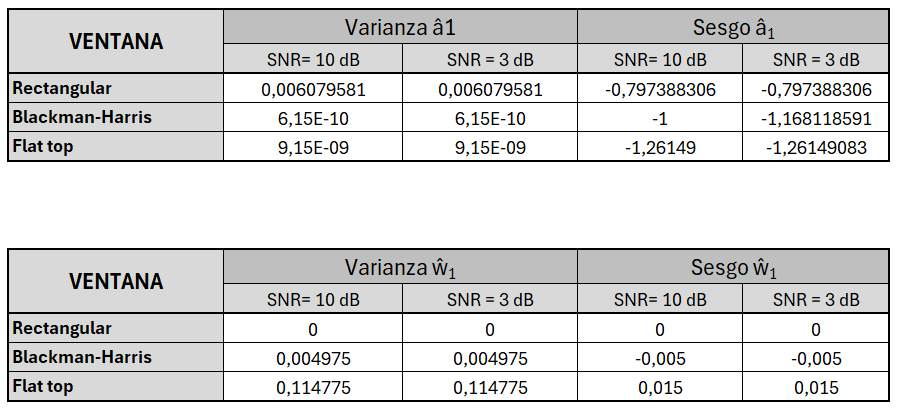

A partir de los resultados obtenidos en la tabla, se concluye que a medida que el SNR es mayor, la varianza disminuye, tanto para el estimador de amplitud, como para el de frecuencia. En cuanto al sesgo, se mantiene relativamente estable para el estimador de amplitud, y variando leventemene en el de frecuencia (leve mejoría cuando SNR es mayor). En adición, se observa mayor influencia del SNR en el estimador de frecuencia, puede que esto se atribuya a que depende del máximo espectral y es sensible al ruido.
